Now, modify the code to consider the problem of a baseball. Assume a launch height of 1m above ground level.  For the initial launch speed, use 100 mph (converted to m/s, of course).  What is the idea launch angle in this case?  Compare your results to those obtained here:

In [10]:
from array import array
import numpy as np
import math

In [11]:
# Initial Conditions
speed = 44.704 #100 mph = 44.704 m/s
angle_arr_2 = np.linspace(0,100,500)

speed = (-1/0.78959*(angle_arr_2-110.31))*0.44704
y1 = 1.0

# Other constants 
Cd = (0.33 + 0.36)/2 # drag coefficient between 0.33 and 0.36
area = 0.004155  # cross sectional area of projectile square meters
grav = 9.81 # gravitional acceleration
mass = (0.145 + 0.149)/2  # mass in kg
rho = 1.225 # density of air (kg/m^3)
air_const = -0.5*Cd*rho*area/mass
Pi = math.pi

range_2 = []
rangeTheory_2 = []
x = 0
for _ in range(len(angle_arr_2)):
    angle = angle_arr_2[_]
    r1 = array('d')
    v1 = array('d')
    r = array('d')
    v = array('d')
    accel = array('d')

    r1.append(0)    
    r1.append(y1)
    v1.append(speed[_]*math.cos(angle*Pi/180.0))
    v1.append(speed[_]*math.sin(angle*Pi/180.0))

    r.append(r1[0])
    r.append(r1[1])
    v.append(v1[0])
    v.append(v1[1])
    accel.append(0)
    accel.append(0)
    
    # Setup arrays for Euler and Euler-Cromer Methods
    re = array('d')
    ve = array('d')
    accele = array('d')

    re.append(r1[0])
    re.append(r1[1])
    ve.append(v1[0])
    ve.append(v1[1])
    accele.append(0)
    accele.append(0)

    rec = array('d')
    vec = array('d')
    accelec = array('d')

    rec.append(r1[0])
    rec.append(r1[1])
    vec.append(v1[0])
    vec.append(v1[1])
    accelec.append(0)
    accelec.append(0)
    
    tau = 0.0002 # timestep in seconds
    maxStep = 1000000 # maximum number of steps

    xplot = array('d')
    yplot = array('d')
    xplote = array('d')
    yplote = array('d')
    xplotec = array('d')
    yplotec = array('d')
    xNoAir = array('d')
    yNoAir = array('d')
    time = array('d')
    timee = array('d')
    timeec = array('d')
    timeNoAir = array('d')
    
    endtime = 0
    nelements = 0
    
    iStep = 1
    while iStep < maxStep+1:
    
        t = (iStep-1)*tau
        
        xplot.append(r[0])
        yplot.append(r[1])
        xplote.append(re[0])
        yplote.append(re[1])
        xplotec.append(rec[0])
        yplotec.append(rec[1])
        xNoAir.append(r1[0]+v1[0]*t)
        yNoAir.append(r1[1]+v1[1]*t-0.5*grav*t*t)
    
        timeNoAir.append(t)
        time.append(t)
        timee.append(t)
        timeec.append(t)
    
        # Euler Method
        normVe = math.sqrt(ve[0]*ve[0]+ve[1]*ve[1])
        accele[0]=air_const*normVe*ve[0]
        accele[1]=air_const*normVe*ve[1]-grav
        re[0] = re[0] + tau*ve[0]
        re[1] = re[1] + tau*ve[1]
        ve[0] = ve[0] + tau*accele[0]
        ve[1] = ve[1] + tau*accele[1]
    
        # Euler-Cromer Method
        normVec = math.sqrt(vec[0]*vec[0]+vec[1]*vec[1])
        accelec[0]=air_const*normVec*vec[0]
        accelec[1]=air_const*normVec*vec[1]-grav
        vec[0] = vec[0] + tau*accelec[0]
        vec[1] = vec[1] + tau*accelec[1]    
        rec[0] = rec[0] + tau*vec[0]
        rec[1] = rec[1] + tau*vec[1]
    
        # MidPoint Method
        normV = math.sqrt(v[0]*v[0]+v[1]*v[1])
        accel[0]=air_const*normV*v[0]
        accel[1]=air_const*normV*v[1]-grav
        vxnew = v[0] + tau*accel[0]
        vynew = v[1] + tau*accel[1]
        r[0] = r[0] + tau*(v[0] + vxnew)/2.0
        r[1] = r[1] + tau*(v[1] + vynew)/2.0
        v[0] = vxnew
        v[1] = vynew    
    
        #print ("x = %f     vx = %f    ax = %f" %(r[0],v[0],accel[0]))
        #print ("y = %f     vy = %f    ay = %f" %(r[1],v[1],accel[1]))
    
        if (r[1] < 0 and v[1] < 0):
            xplot.append(r[0])
            yplot.append(r[1])
            xplote.append(re[0])
            yplote.append(re[1])
            xplotec.append(rec[0])
            yplotec.append(rec[1])
            time.append(tau*iStep)
            timee.append(tau*iStep)
            timeec.append(tau*iStep)
            endtime = tau*iStep
            nelements = iStep
            break
        
    # print ("Maximum range is %f meters." % r[0])
    # print ("Theory maximum range is %f meters." % (speed*speed/grav*math.sin(2.0*angle*Pi/180.0)))
    # print (" ")
    range_2.append(r[0])
    rangeTheory_2.append(speed*speed/grav*math.sin(2.0*angle*Pi/180.0))

    # print ("Time of flight is %f seconds." % endtime)
    # print ("Theory time of flight is %f seconds." % (2.0*speed/grav*math.sin(angle*Pi/180.0)))
    # print (" ")

    max_y = np.amax(yNoAir)+1
    max_x = np.amax(xNoAir)+1
    max_t = np.amax(time)+1

    # print ("Max y = %f" % max_y)
    # print ("Theory Max y = %f" % (speed*speed/(2.0*grav)*math.pow(math.sin(angle*Pi/180.0),2)))
    # print (" ")
    # 
    # 
    # print ("Number of elements = %d" % nelements)
    

Maximum range is 110.746330 meters at 26.052104 degrees.
Maximum range in feet is 363.340990


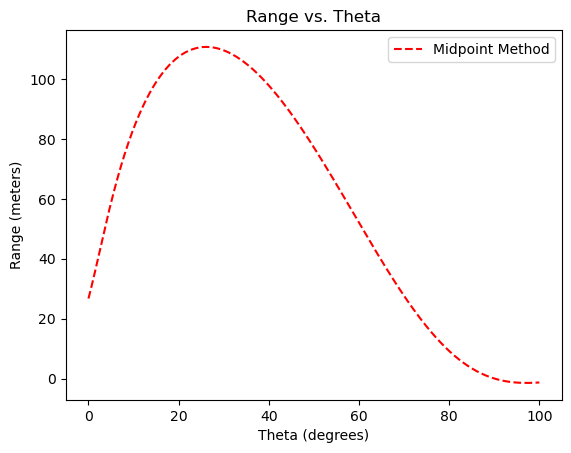

In [12]:
import matplotlib.pyplot as plt
plt.plot(angle_arr_2,range_2,'r--',label='Midpoint Method')
#plt.plot(theta_array,prangeTheory,'b-',label='Theory')
plt.xlabel('Theta (degrees)')
plt.ylabel('Range (meters)')
plt.title('Range vs. Theta')
plt.legend()

idx = np.argmax(range_2)
print ("Maximum range is %f meters at %f degrees." % (range_2[idx],angle_arr_2[idx]))
print("Maximum range in feet is %f" % (range_2[idx]*3.28084))

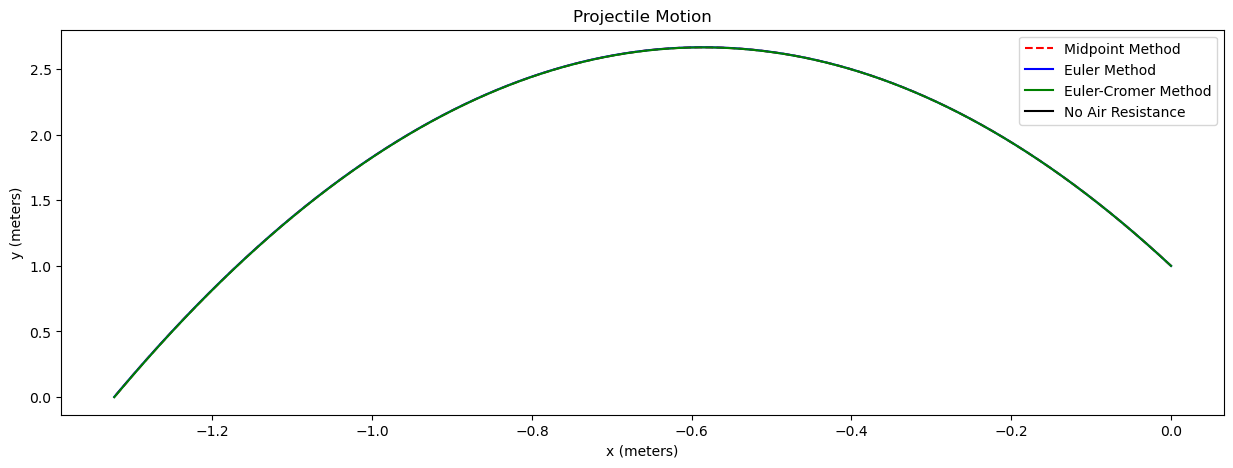

In [13]:
fig = plt.figure(figsize=(15,5))
plt.plot(xplot,yplot,'r--',label='Midpoint Method')
plt.plot(xplote,yplote,'b-',label='Euler Method')
plt.plot(xplotec,yplotec,'g-',label='Euler-Cromer Method')
plt.plot(xNoAir,yNoAir,'k-',label='No Air Resistance')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Projectile Motion')
plt.legend()